In [1]:
!pip install neo4j

  Created wheel for neo4j: filename=neo4j-4.4.2-py3-none-any.whl size=115338 sha256=4117124877b45132194c50f8a6a3e716e030699f89ec360abd895995fd2bd3e9
  Stored in directory: c:\users\sli\appdata\local\pip\cache\wheels\b2\eb\0e\c044a97207dcce32f7dc75dcdd5e29f275b3cfcde84da8980a
Successfully built neo4j


In [1]:
# Import modules from neo4j library
from neo4j import GraphDatabase, basic_auth

# Establish connection with neo4j database
# mention your host, port, username & password(default port is 7687 and default host is localhost)

driver = GraphDatabase.driver("bolt://localhost:7687", auth = basic_auth("neo4j","12345"))

# create a neo4j session in python

session = driver.session()

In [2]:
# store neo4j query as a string

query='''
match (u1:User)-[r:IS_RETWEETED_BY]->(u2:User)
return u1.name as user_name, count(u2) as outDegree
order by outDegree desc
limit 10
'''

result = session.run(query)

result

In [3]:
import pandas as pd
result_df=pd.DataFrame(dict(_) for  _ in result)

In [4]:
result_df

,user_name,outDegree
0,DanielTurnerPTF,5504
1,IPCC_CH,5356
2,JackPosobiec,4419
3,JordanSchachtel,4215
4,SenSanders,2715
5,RepThomasMassie,2671
6,PeterSweden7,2621
7,cryptobri_,2555
8,RhinoSavannaNFT,2211
9,SadhguruJV,2072


In [21]:
# change column header

result_df.columns=["user_name", "NumberOfRetweetedUsers"]
result_df

,user_name,NumberOfRetweetedUsers
0,DanielTurnerPTF,5504
1,IPCC_CH,5356
2,JackPosobiec,4419
3,JordanSchachtel,4215
4,SenSanders,2715
5,RepThomasMassie,2671
6,PeterSweden7,2621
7,cryptobri_,2555
8,RhinoSavannaNFT,2211
9,SadhguruJV,2072


<AxesSubplot:xlabel='NumberOfRetweetedUsers', ylabel='user_name'>

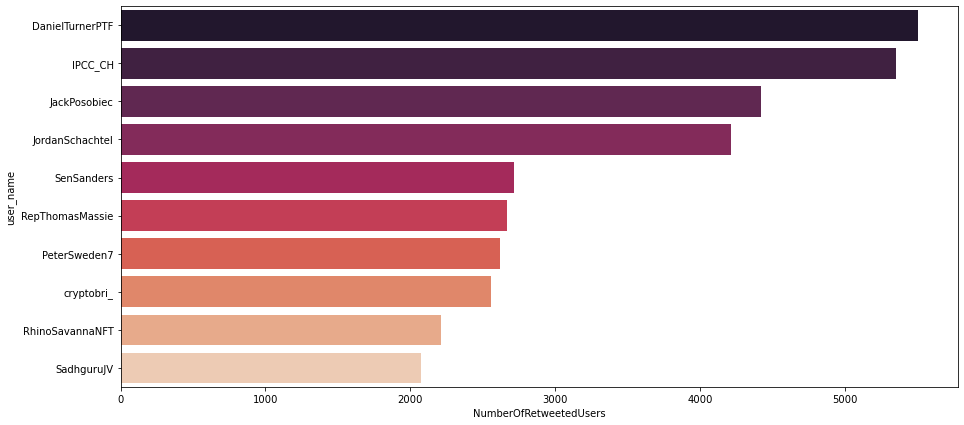

In [23]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)

# plot a bar chart
sns.barplot(
    x="NumberOfRetweetedUsers", 
    y="user_name", 
    data=result_df, 
    palette=palette)

In [27]:
# Create a named graph

query='''CALL gds.graph.create.cypher(
    "myGraph", 
    "MATCH (u:User) 
        RETURN id(u) as id", 
    "MATCH (u1:User)-[r:IS_RETWEETED_BY]->(u2:User)
        RETURN id(u1) as source, id(u2) as target,  r.numRetweets as weight"
)
'''
session.run(query)

In [43]:
# calcualte page rank, list top 10 user based on page rank

query1='''
CALL gds.pageRank.stream(
    "myGraph", {
        relationshipWeightProperty: "weight"
    }
) YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name as user, round(score * 100)/100 as score
ORDER BY score desc
limit 10
'''

result=session.run(query1)

result_df=pd.DataFrame(dict(_) for  _ in result)

result_df.head()

,user,score
0,JFSebastian146,123.36
1,imagine_garden,31.44
2,Eco1stArt,29.72
3,trvestuff,26.65
4,jane__eden,21.47


Text(0.5, 1.0, 'Top 10 Users by Page Rank Score')

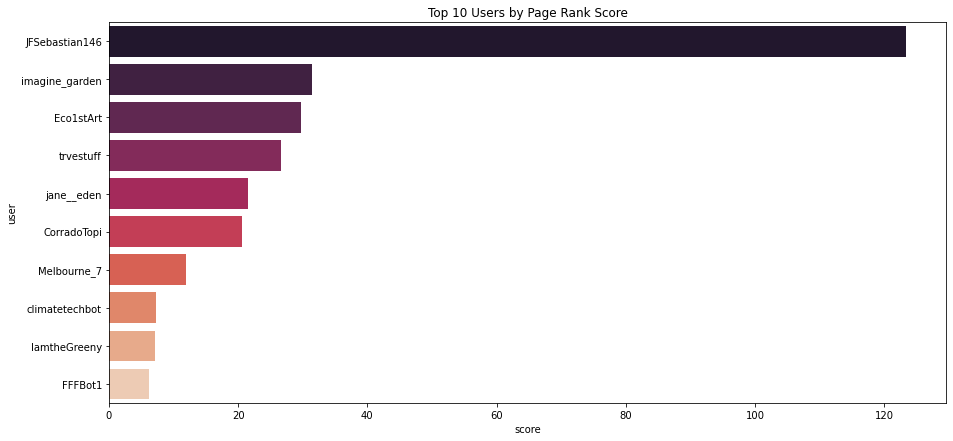

In [46]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)

# plot a bar chart
ax=sns.barplot(
    x="score", 
    y="user", 
    data=result_df, 
    palette=palette)

ax.set_title("Top 10 Users by Page Rank Score")

In [31]:
# retrieve all properties of a user

query='''
match (u:User)
return u.name, u.betweenness, u.closeness, u.eigenvector, u.favorites, u.followers, u.friends, u.joining_year, u.location, u.pageRank
'''

result=session.run(query)

result_df=pd.DataFrame(dict(_) for  _ in result)

result_df.head()

,u.name,u.betweenness,u.closeness,u.eigenvector,u.favorites,u.followers,u.friends,u.joining_year,u.location,u.pageRank
0,SyShere,0.0,0.0,0.000004,55969,577,569,2013,Poland,0.150000
1,CarmelKielty1,0.0,0.0,0.000004,17228,330,792,2019,None,0.150000
2,johngleeson52,0.0,0.0,0.090791,359,1250,1144,2016,Australia,0.151633
3,tb_moshabi,0.0,0.0,0.000004,16404,759,1173,2018,South Africa,0.150000
4,BlokeStokey,0.0,0.0,0.000007,65504,709,1300,2019,Great Britian,0.150213


In [39]:
# top 10 users by betweenness centrality

result_df1=result_df.sort_values('u.betweenness', ascending=False)[['u.name', 'u.betweenness']].head(10)

result_df1.columns=['User Name', 'Betweenness']

result_df1

,User Name,Betweenness
237471,SaleemulHuq,3.803909e+07
217527,LeoHickman,2.222626e+07
155557,PFriedling,2.184407e+07
174805,ECOWARRIORSS,1.449229e+07
147711,takvera,1.041254e+07
247095,redmayne_robert,9.935590e+06
177565,timonmcphearson,9.918524e+06
122607,schipper_lisa,9.891530e+06
240869,wormmaps,9.608424e+06
14982,christrisos,9.598565e+06


Text(0.5, 1.0, 'Top 10 Users by Betweeness Centrality')

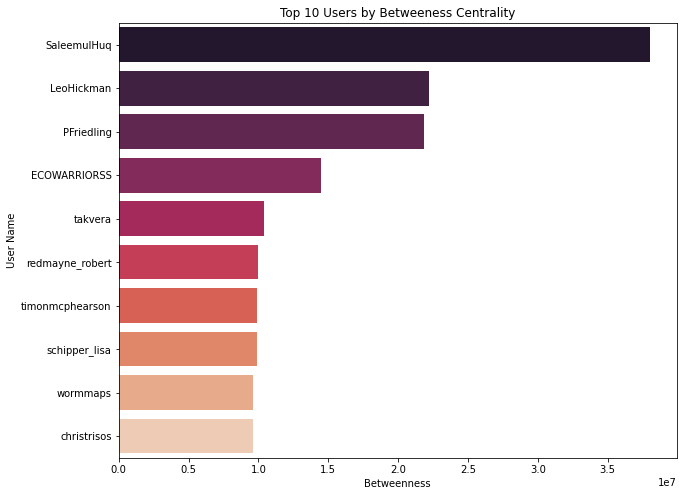

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [10,8]

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)

# plot a bar chart
ax=sns.barplot(
    x="Betweenness", 
    y="User Name", 
    data=result_df1, 
    palette=palette)

ax.set_title("Top 10 Users by Betweeness Centrality")

In [44]:
import datetime as dt

dt.datetime.today().year

2022

In [45]:
# calculate the number of joinning year
import datetime as dt

current_year=dt.datetime.today().year

result_df['YearsJoining']=current_year-result_df['u.joining_year']

result_df1=result_df.drop(columns="u.joining_year")

result_df1.corr()

,u.betweenness,u.closeness,u.eigenvector,u.favorites,u.followers,u.friends,u.pageRank,YearsJoining
u.betweenness,1.000000,0.004722,0.206899,0.003186,0.003897,0.023017,0.043096,0.006541
u.closeness,0.004722,1.000000,-0.003303,-0.005206,0.013343,0.013028,0.001929,0.009993
u.eigenvector,0.206899,-0.003303,1.000000,0.033871,-0.001428,0.033400,0.374865,-0.001437
u.favorites,0.003186,-0.005206,0.033871,1.000000,-0.006021,0.173572,0.019790,0.147304
u.followers,0.003897,0.013343,-0.001428,-0.006021,1.000000,0.125044,-0.000909,0.030064
u.friends,0.023017,0.013028,0.033400,0.173572,0.125044,1.000000,0.009086,0.112197
u.pageRank,0.043096,0.001929,0.374865,0.019790,-0.000909,0.009086,1.000000,0.003502
YearsJoining,0.006541,0.009993,-0.001437,0.147304,0.030064,0.112197,0.003502,1.000000


<AxesSubplot:>

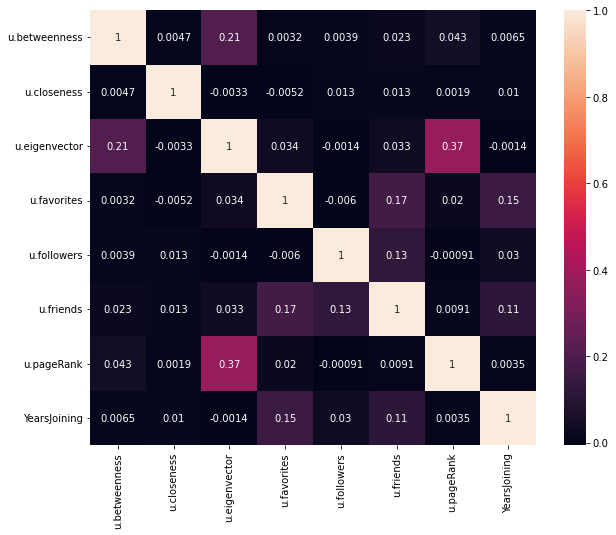

In [46]:
# create a heat map to see whether there is any correlation between centrality metrices and a user's property.

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [10,8]


corr_values = result_df1.corr()
sns.heatmap(corr_values, annot= True)

In [47]:
# you may close the connection after finishing with the queries

session.close()